In [1]:
# This notebook is used for visualizing and understanding deep feaures

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from Sequence import Sequence
from matplotlib.patches import Rectangle
import os
import torch
from torch.autograd import Variable
import vgg

import utils
from scipy import misc,ndimage
import Visualize

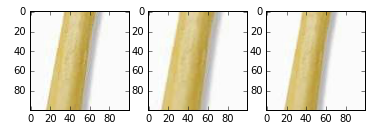

In [2]:
img = misc.imread('example.jpg')

img_m = utils.get_subwindow(img,pos=[212.,212.],sz=np.array([100,100]))
img_s = utils.get_subwindow(img,pos=[212.,212.],sz=np.array([100,100]),
                            scale_factor=0.9)
img_l = utils.get_subwindow(img,pos=[212.,212.],sz=np.array([100,100]),
                            scale_factor=1.1)
plt.subplot(131)
plt.imshow(img_m)
plt.subplot(132)
plt.imshow(img_s)
plt.subplot(133)
plt.imshow(img_l)

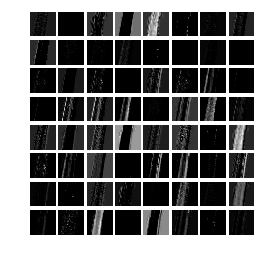

In [4]:
# network init

model = vgg.VGG_19(outputlayer=[3])

# load partial weights
model_dict = model.state_dict()
params = torch.load('vgg19.pth')
load_dict = {k:v for k,v in params.items() if 'features' in k}
model_dict.update(load_dict)
model.load_state_dict(model_dict)

# extract features

imgMean = np.array([0.485, 0.456, 0.406], np.float)
imgStd = np.array([0.229,0.224,0.225])
img_m = misc.imresize(img_m,(224,224))/255.
img_m = (img_m-imgMean)/imgStd
img_m = np.transpose(img_m, (2,0,1))
feature2 = model(Variable(torch.from_numpy(img_m[None,:,:,:]).float()))
feature = feature2.data[0].numpy()
x = ndimage.zoom(feature, (1, float(100)/feature.shape[1],
                           float(100)/feature.shape[2]), order=1)
Visualize.imshow_grid(x,shape=[8,8])